In [21]:
import matplotlib
import os.path

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [22]:
BASE_PATH="/home/nikolas/PycharmProjects/MasterThesis_SoftwareEngineering/Devices/MiddleWare/Analytics"

In [23]:
participants=8
batchsize=10

In [24]:
data={}
for device in range(1,participants+1):
    temp={}
    temp['Round_Classification_Report']=pd.read_csv(os.path.join(os.path.join(os.path.join(os.path.join(BASE_PATH,"NumberOfParticipants_"+str(participants)),"BatchSize_"+str(batchsize)),"Device_"+str(device)),"Round_Classification_Report"))
    temp['Round_Gas']=pd.read_csv(os.path.join(os.path.join(os.path.join(os.path.join(BASE_PATH,"NumberOfParticipants_"+str(participants)),"BatchSize_"+str(batchsize)),"Device_"+str(device)),"Round_Gas"))
    temp['Round_Proof_Time']=pd.read_csv(os.path.join(os.path.join(os.path.join(os.path.join(BASE_PATH,"NumberOfParticipants_"+str(participants)),"BatchSize_"+str(batchsize)),"Device_"+str(device)),"Round_Proof_Time"))
    temp['Round_Score']=pd.read_csv(os.path.join(os.path.join(os.path.join(os.path.join(BASE_PATH,"NumberOfParticipants_"+str(participants)),"BatchSize_"+str(batchsize)),"Device_"+str(device)),"Round_Score"))
    temp['Round_Time']=pd.read_csv(os.path.join(os.path.join(os.path.join(os.path.join(BASE_PATH,"NumberOfParticipants_"+str(participants)),"BatchSize_"+str(batchsize)),"Device_"+str(device)),"Round_Time"))
    temp['Round_Training_Local_Time']=pd.read_csv(os.path.join(os.path.join(os.path.join(os.path.join(BASE_PATH,"NumberOfParticipants_"+str(participants)),"BatchSize_"+str(batchsize)),"Device_"+str(device)),"Round_Training_Local_Time"))
    temp['Round_Update_Blockchain_Time']=pd.read_csv(os.path.join(os.path.join(os.path.join(os.path.join(BASE_PATH,"NumberOfParticipants_"+str(participants)),"BatchSize_"+str(batchsize)),"Device_"+str(device)),"Round_Update_Blockchain_Time"))
    data['Device_'+str(device)]=temp

In [25]:
def calc_devices_mean(data,kpi,x):
    df=pd.DataFrame()
    for participant in devices:
        g=data["Device_"+str(participant)]
        df=pd.concat([df,g[kpi][x]])
    by_row_index = df.groupby(df.index)
    df_means = by_row_index.mean()
    return df_means

def plot_gas(data):
    plt.xlabel("Update-Round")
    plt.ylabel("Gas-Costs")
    plt.boxplot(data["Gas-Costs"])
def plot_proof_time(data):
    plt.xlabel("Update-Round")
    plt.ylabel("Time-Taken")
    plt.plot(data["Round-Number"],data["Time-Taken"])
def plot_training_local_time(data):
    plt.xlabel("Update-Round")
    plt.ylabel("Time-Taken")
    plt.plot(data["Round-Number"],data["Time-Taken"])
def plot_round_time(data):
    plt.xlabel("Update-Round")
    plt.ylabel("Time-Taken")
    plt.plot(data["Round-Number"],data["Time-Taken"])
def plot_score(data):
    plt.xlabel("Update-Round")
    plt.ylabel("Score")
    plt.plot(data["Round-Number"],data["Score"])
def plot_update_blockchain_time(data):
    plt.xlabel("Update-Round")
    plt.ylabel("Time-Taken")
    z = np.polyfit(data["Round-Number"], data["Time-Taken"], 1)
    p = np.poly1d(z)
    plt.scatter(data["Round-Number"],data["Time-Taken"])
    plt.plot(data["Round-Number"],p(data["Round-Number"]))

def plot_classification_report(data):
    plt.xlabel("Update-Round")
    plt.ylabel("Precision")
    plt.plot(data["Round-Number"],data[["1","2","3","4","5","6"]])
    plt.legend(["1","2","3","4","5","6"])

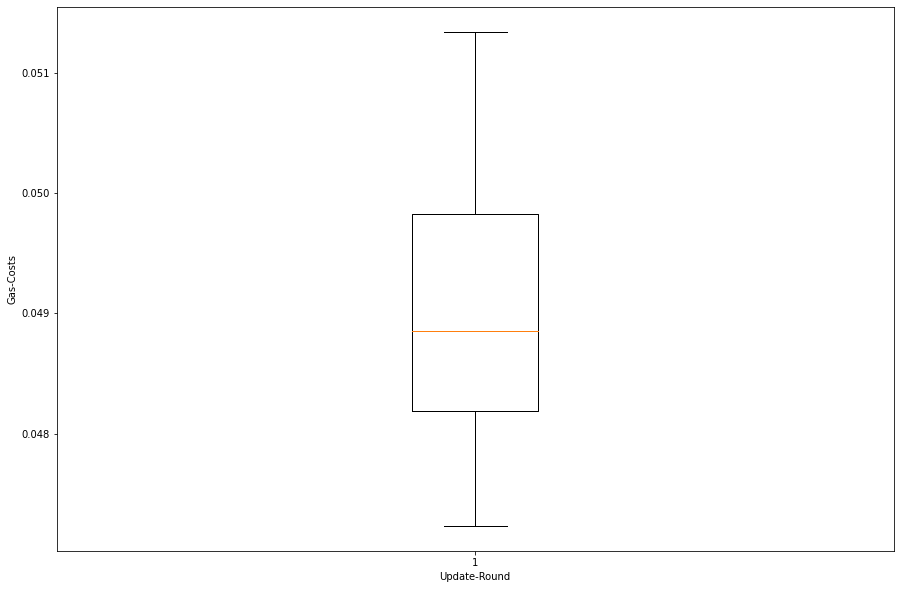

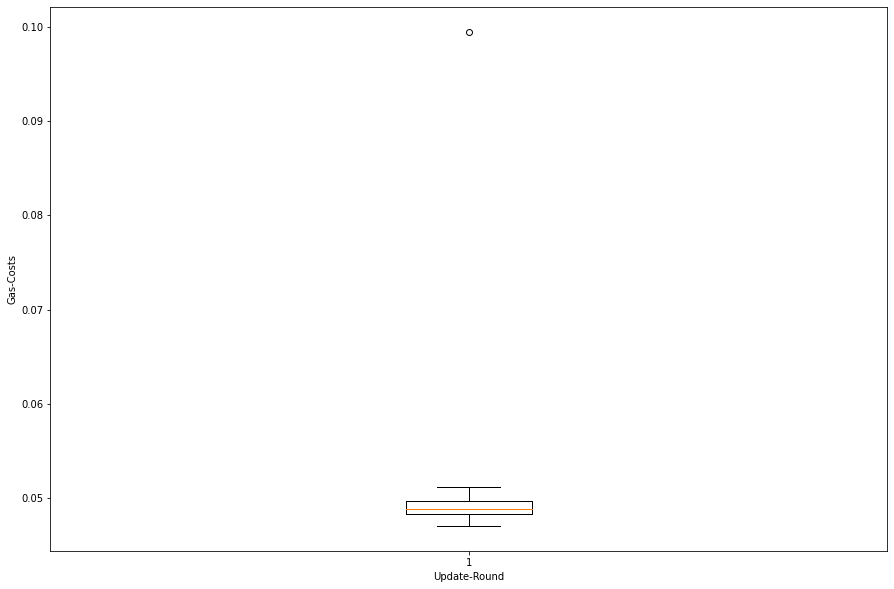

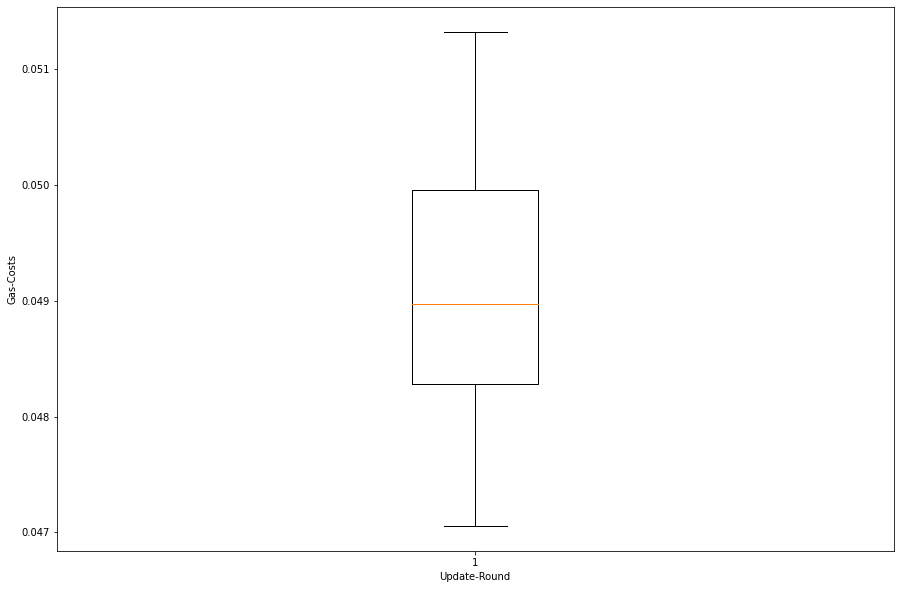

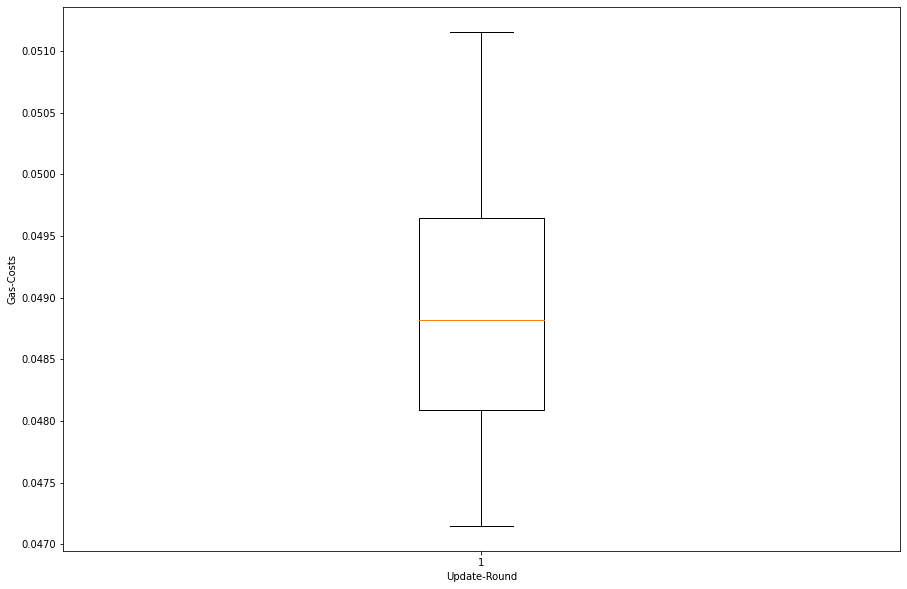

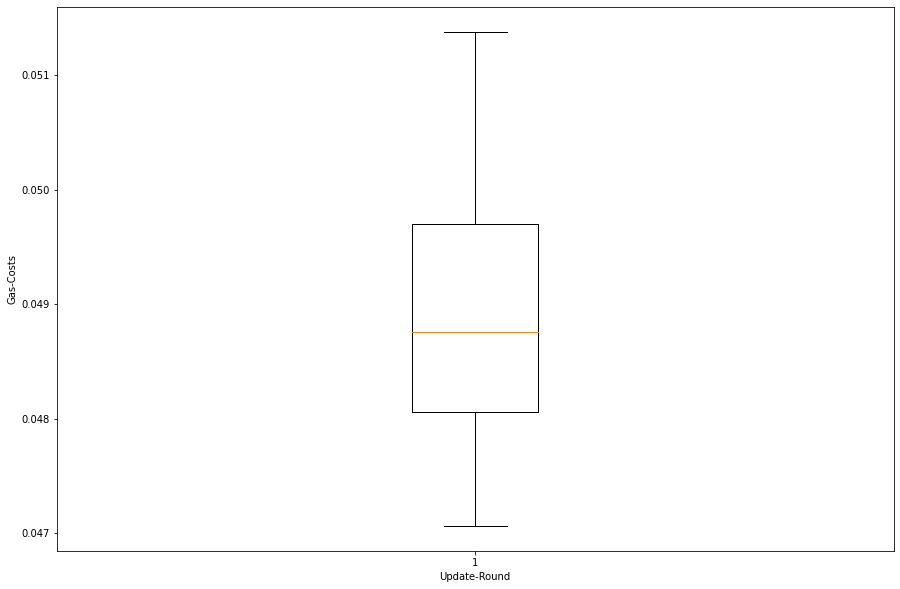

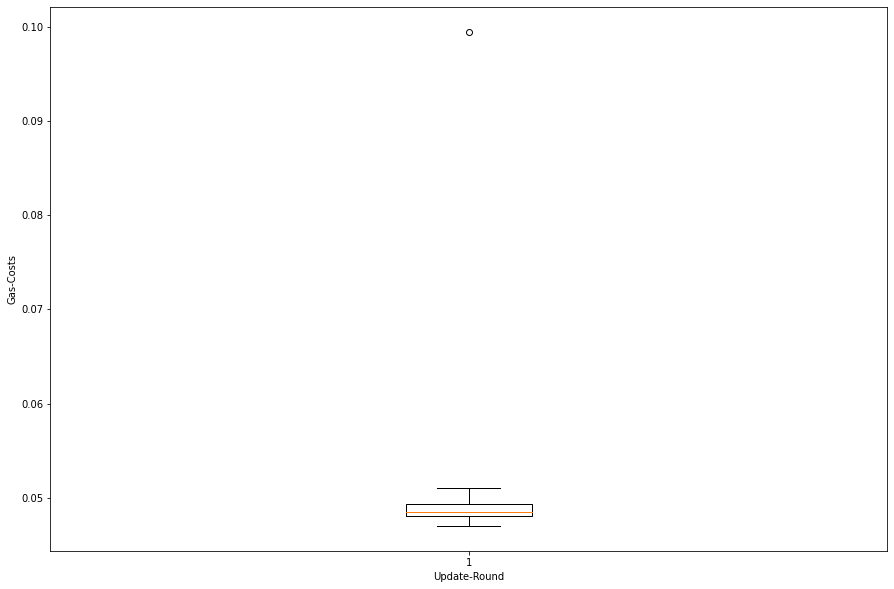

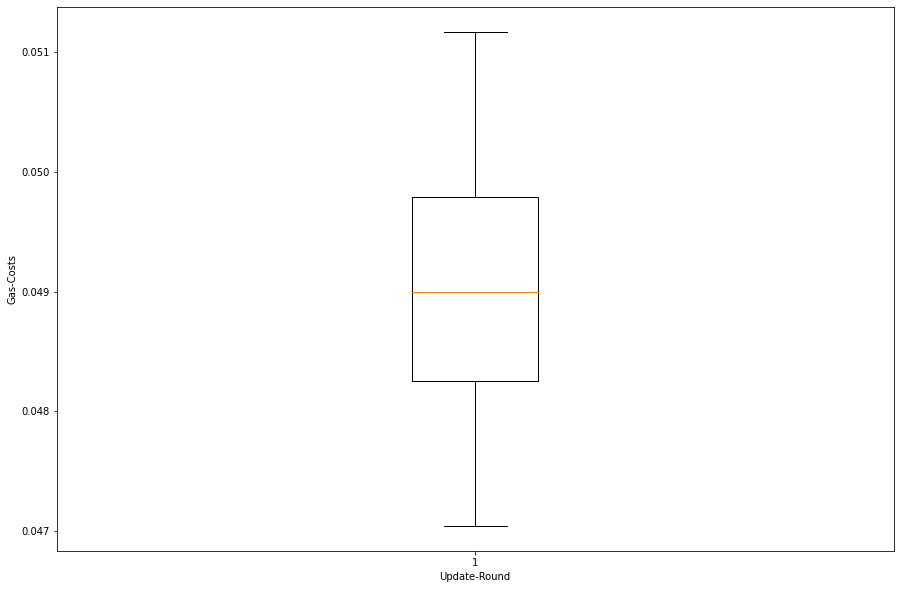

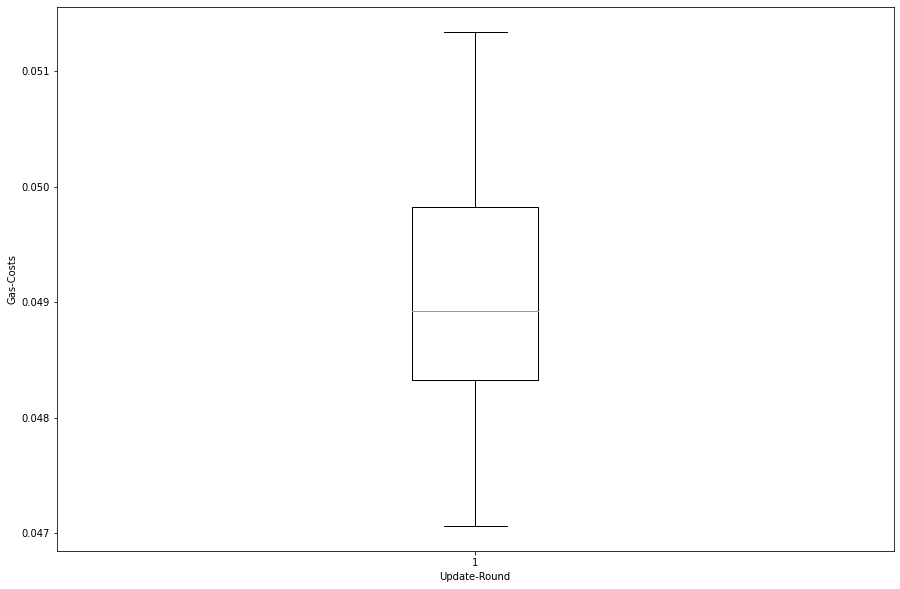

In [26]:
for device in data.keys():
    df=data[device]
    plt.figure(figsize=(15,10))
    plot_gas(df["Round_Gas"])
    plt.show()

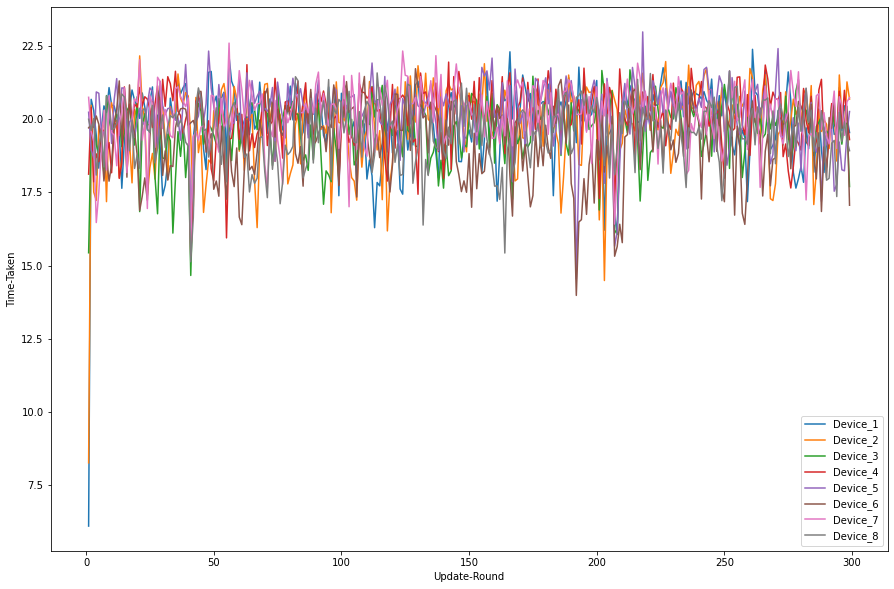

In [27]:
plt.figure(figsize=(15,10))
for device in data.keys():
    df=data[device]
    plot_training_local_time(df["Round_Training_Local_Time"])
plt.legend(list(data.keys()))

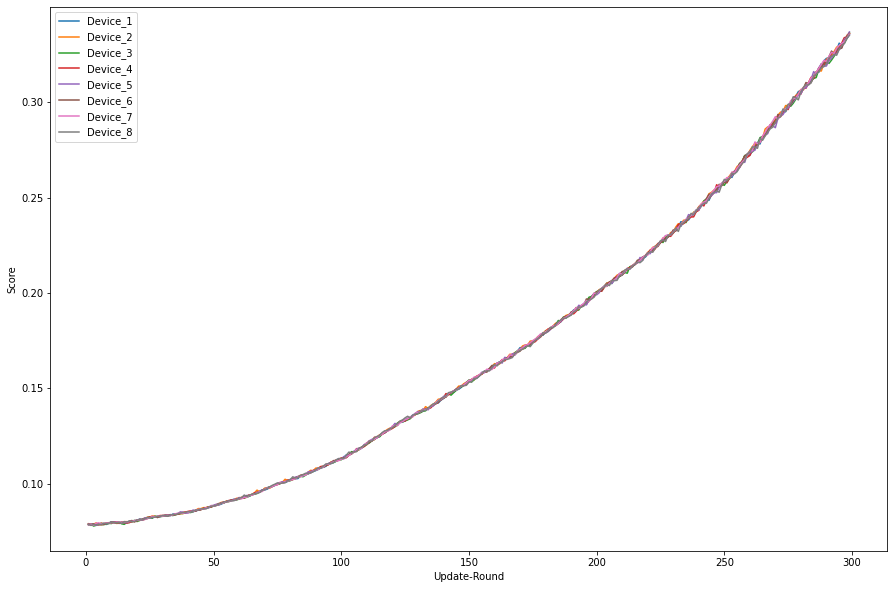

In [28]:
plt.figure(figsize=(15,10))
for device in data.keys():
    df=data[device]
    plot_score(df["Round_Score"])
plt.legend(list(data.keys()))

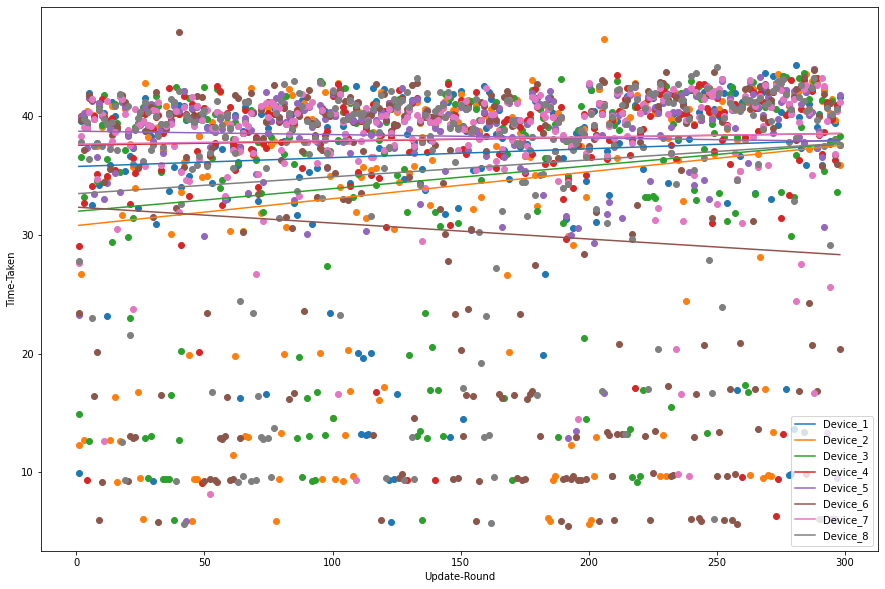

In [29]:
plt.figure(figsize=(15,10))
for device in data.keys():
    df=data[device]
    plot_update_blockchain_time(df["Round_Update_Blockchain_Time"])
plt.legend(list(data.keys()))

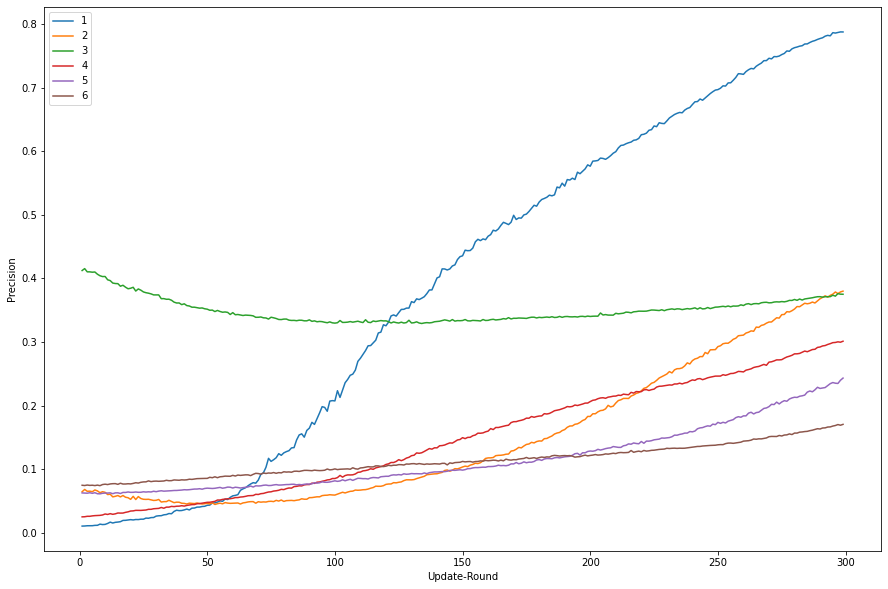

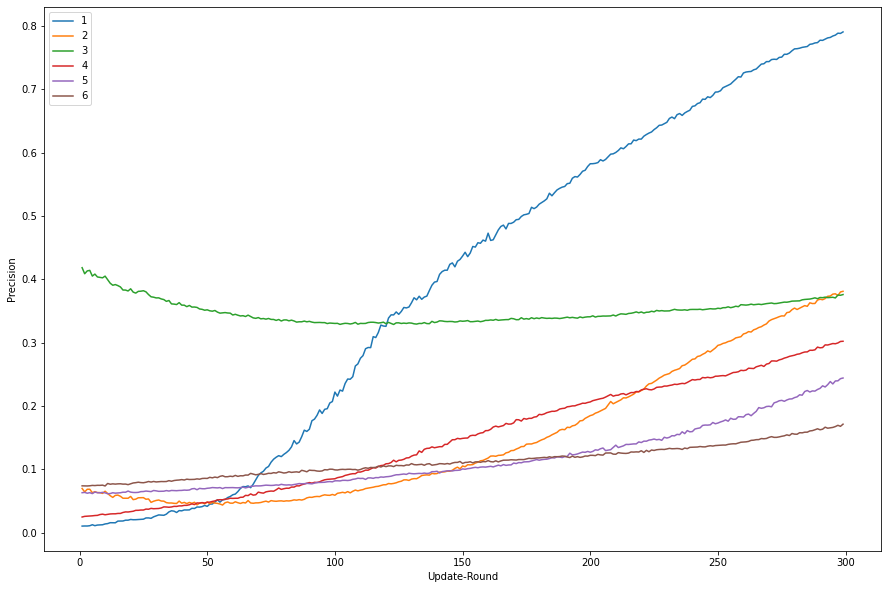

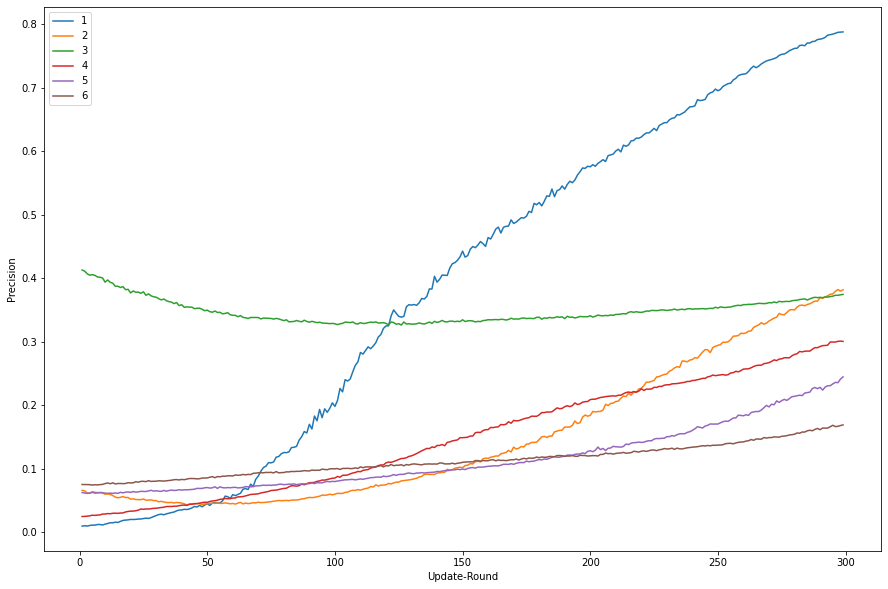

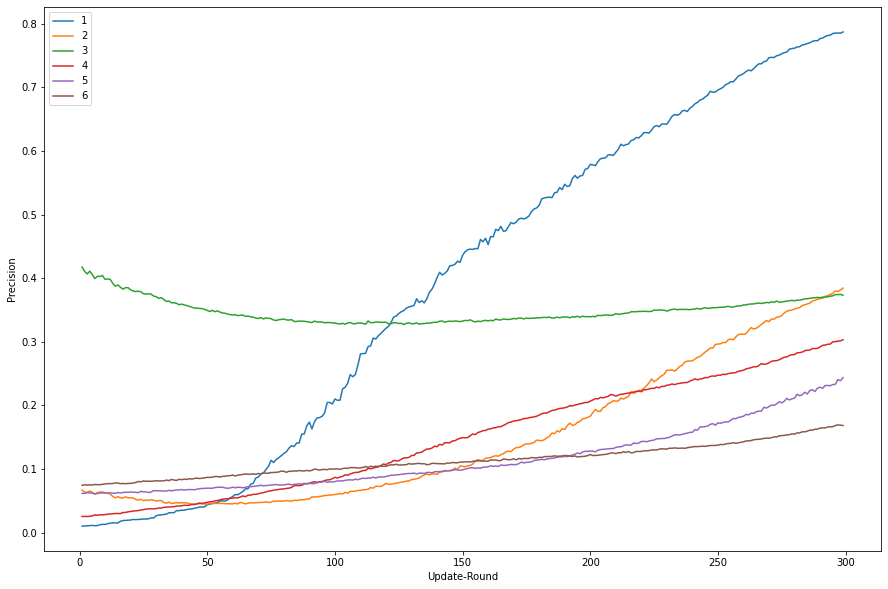

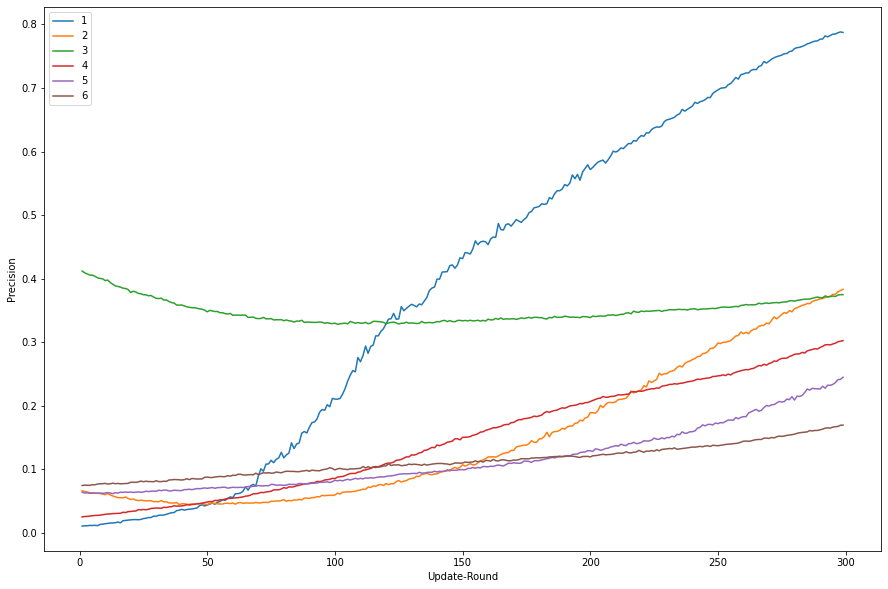

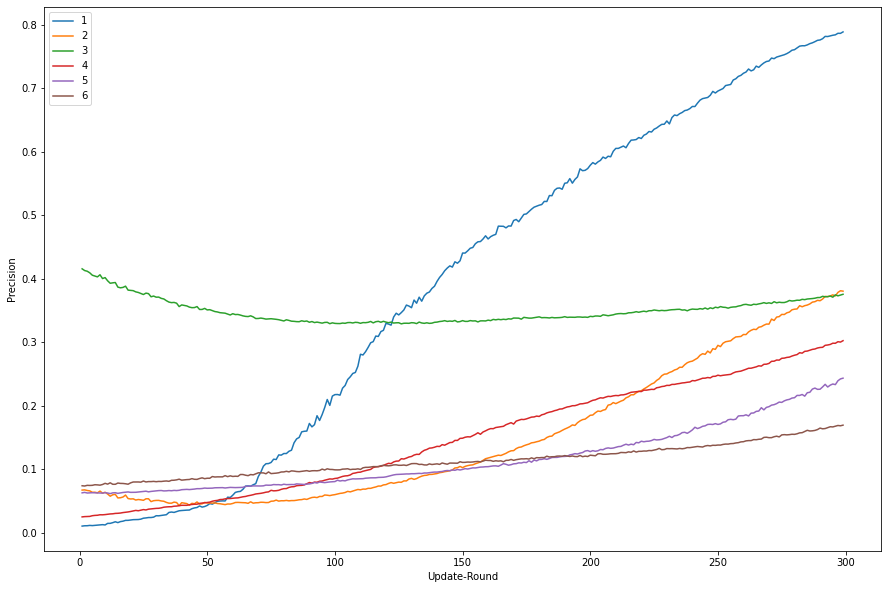

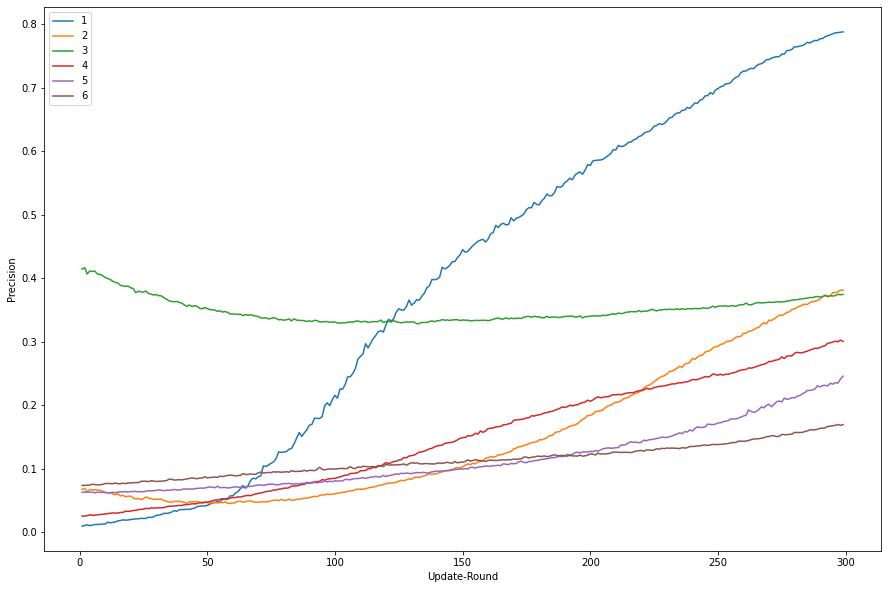

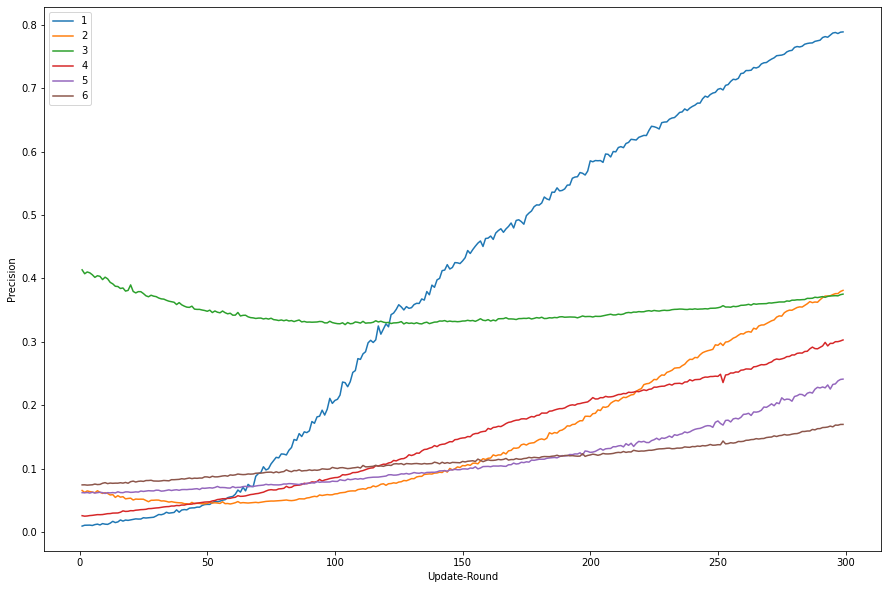

In [30]:
for device in data.keys():
    df=data[device]
    plt.figure(figsize=(15,10))
    plot_classification_report(df["Round_Classification_Report"])
    plt.show()

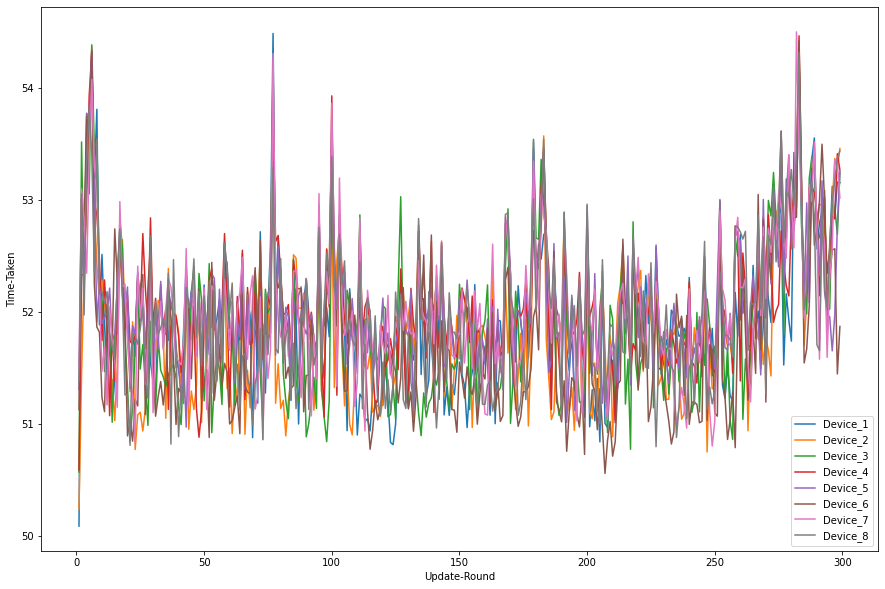

In [31]:
plt.figure(figsize=(15,10))
for device in data.keys():
    df=data[device]
    plot_proof_time(df["Round_Proof_Time"])
plt.legend(list(data.keys()))

In [32]:
batchsizes=[10,20,30,40]
participants=range(8,9)
devices=range(1,9)

In [33]:
data={}
for participant in participants:
    temp_p={}
    for batchsize in batchsizes:
        temp_b={}
        for device in range(1,participant+1):
            temp_d={}
            p=os.path.join(BASE_PATH,"NumberOfParticipants_"+str(participant))
            p=os.path.join(  p,"BatchSize_"+str(batchsize))
            p=os.path.join(  p,"Device_"+str(device))
            try:
                temp_d['Round_Classification_Report']=pd.read_csv(os.path.join(p,"Round_Classification_Report"))
                temp_d['Round_Gas']=pd.read_csv(os.path.join(  p,"Round_Gas"))
                temp_d['Round_Proof_Time']=pd.read_csv(os.path.join(  p,"Round_Proof_Time"))
                temp_d['Round_Score']=pd.read_csv(os.path.join(  p,"Round_Score"))
                temp_d['Round_Time']=pd.read_csv(os.path.join(  p,"Round_Time"))
                temp_d['Round_Training_Local_Time']=pd.read_csv(os.path.join(  p,"Round_Training_Local_Time"))
                temp_d['Round_Update_Blockchain_Time']=pd.read_csv(os.path.join(  p,"Round_Update_Blockchain_Time"))
                temp_b['Device_'+str(device)]=temp_d
            except FileNotFoundError:
                print("Not found")
        temp_p['BatchSize_'+str(batchsize)]=temp_b
    data['Participants_'+str(participant)]=temp_p

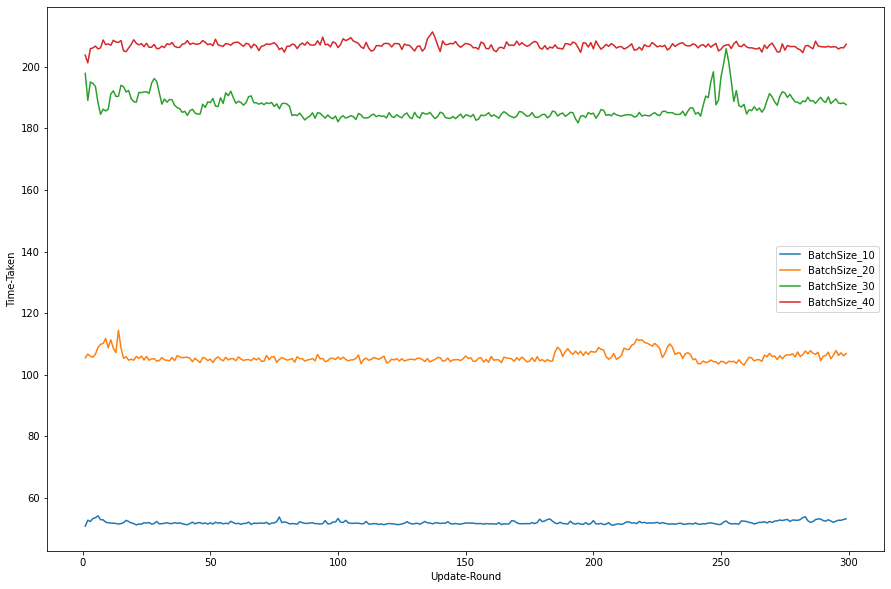

In [34]:
for participant in data.keys():
    batches=data[participant]
    plt.figure(figsize=(15,10))
    for b in batches.keys():
        batch=batches[b]
        if bool(batch):
            t=calc_devices_mean(batch,"Round_Proof_Time","Time-Taken")
            d=pd.DataFrame()
            d["Round-Number"]=range(1,len(t)+1)
            d["Time-Taken"]=t
            plot_proof_time(d)
    plt.legend(list(batches.keys()))
    plt.show()

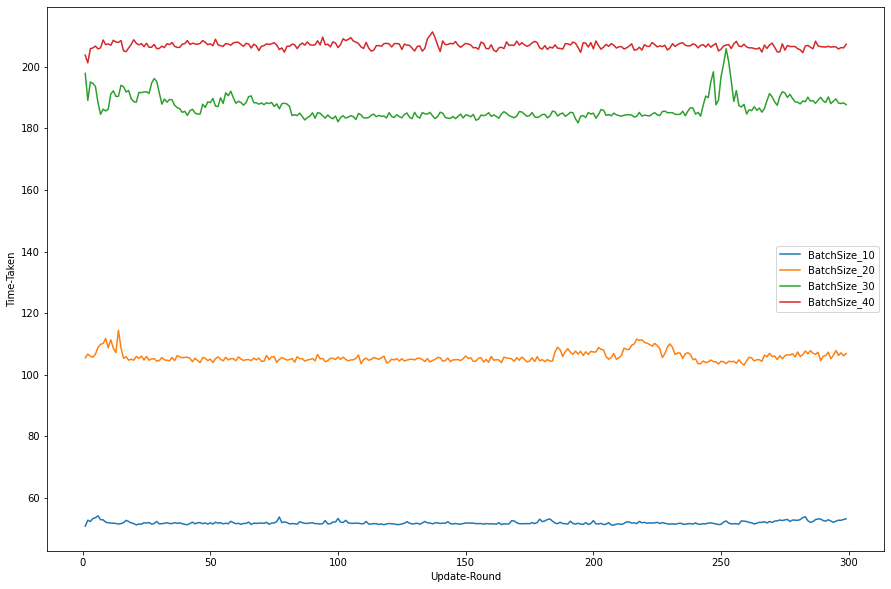

In [35]:
for participant in data.keys():
    batches=data[participant]
    plt.figure(figsize=(15,10))
    for b in batches.keys():
        batch=batches[b]
        if bool(batch):
            plt.rc('pgf', texsystem='pdflatex')
            t=calc_devices_mean(batch,"Round_Proof_Time","Time-Taken")
            d=pd.DataFrame()
            d["Round-Number"]=range(1,len(t)+1)
            d["Time-Taken"]=t
            plot_proof_time(d)
    plt.legend(list(batches.keys()))
    plt.savefig('ProofTimes.pgf')

In [36]:
# for participant in data.keys():
#     batches=data[participant]
#     plt.figure(figsize=(15,10))
#     for b in batches.keys():
#         batch=batches[b]
#         if bool(batch):
#             g=batch["Device_1"]
#             t=g["Round_Gas"]
#             plot_gas(t)
#     plt.legend(list(batches.keys()))
#     plt.show()

/tmp/ipykernel_9422/1846128761.py:17: UserWarning: Legend does not support 'B' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend("BS 20","BS 40")
/tmp/ipykernel_9422/1846128761.py:17: UserWarning: Legend does not support 'S' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend("BS 20","BS 40")
/tmp/ipykernel_9422/1846128761.py:17: UserWarning: Legend does not support ' ' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend("BS 20","BS 40")
/tmp/ipykernel_9422/1846128761.py:17: UserWarning: Legend does not support '2' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/use

<Figure size 1080x720 with 0 Axes>

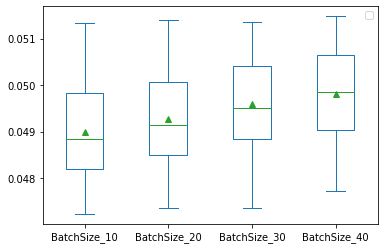

In [37]:
for participant in data.keys():
    batches=data[participant]
    plt.figure(figsize=(15,10))
    dict={}
    plt.rc('pgf', texsystem='pdflatex')
    dict={}
    df=pd.DataFrame()
    for b in batches.keys():
        batch=batches[b]
        if bool(batch):
            g=batch["Device_1"]
            t=g["Round_Gas"]['Gas-Costs']
            dict[b]=t
    for key in dict.keys():
        df[key]=dict[key]
    df.plot(kind='box',showmeans=True)
    plt.legend("BS 20","BS 40")
    plt.savefig('gascosts.pgf')

/tmp/ipykernel_9422/2339521715.py:16: UserWarning: Legend does not support 'B' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend("BS 20","BS 40")
/tmp/ipykernel_9422/2339521715.py:16: UserWarning: Legend does not support 'S' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend("BS 20","BS 40")
/tmp/ipykernel_9422/2339521715.py:16: UserWarning: Legend does not support ' ' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend("BS 20","BS 40")
/tmp/ipykernel_9422/2339521715.py:16: UserWarning: Legend does not support '2' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/use

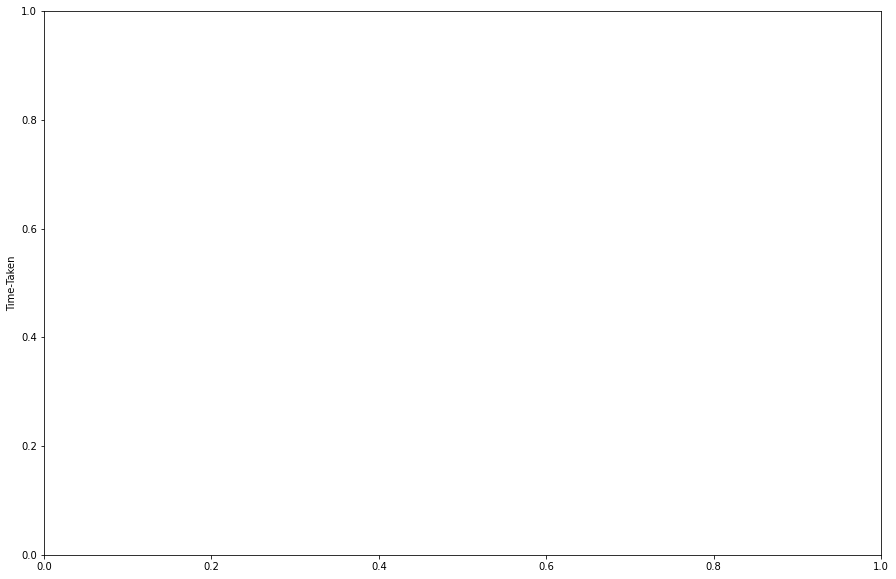

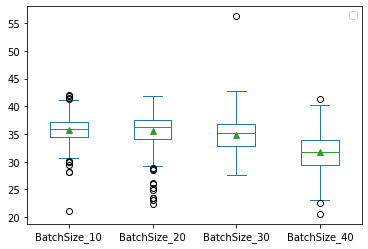

In [38]:
for participant in data.keys():
    batches=data[participant]
    plt.figure(figsize=(15,10))
    plt.rc('pgf', texsystem='pdflatex')
    plt.ylabel("Time-Taken")
    dict={}
    df=pd.DataFrame()
    for b in batches.keys():
        batch=batches[b]
        if bool(batch):
            t=calc_devices_mean(batch,"Round_Update_Blockchain_Time","Time-Taken")
            dict[b]=t
    for key in dict.keys():
        df[key]=dict[key]
    df.plot(kind='box',showmeans=True)
    plt.legend("BS 20","BS 40")
    plt.savefig('roundupdateBCtime.pgf')


/tmp/ipykernel_9422/1581262464.py:15: UserWarning: Legend does not support 'B' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend("BS 20","BS 40")
/tmp/ipykernel_9422/1581262464.py:15: UserWarning: Legend does not support 'S' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend("BS 20","BS 40")
/tmp/ipykernel_9422/1581262464.py:15: UserWarning: Legend does not support ' ' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend("BS 20","BS 40")
/tmp/ipykernel_9422/1581262464.py:15: UserWarning: Legend does not support '2' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/use

<Figure size 1080x720 with 0 Axes>

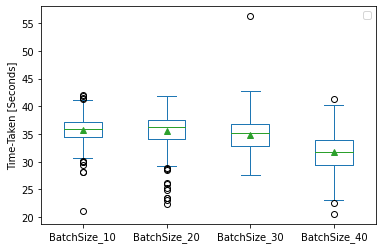

In [39]:

for participant in data.keys():
    batches=data[participant]
    plt.figure(figsize=(15,10))
    dict={}
    plt.rc('pgf', texsystem='pdflatex')
    df=pd.DataFrame(dict.items(),columns=dict.keys())
    for b in batches.keys():
        batch=batches[b]
        if bool(batch):
            g=calc_devices_mean(batch,"Round_Update_Blockchain_Time",'Time-Taken')
            dict[b]=g
    for key in dict.keys():
        df[key]=dict[key]
    df.plot(kind='box',showmeans=True)
    plt.legend("BS 20","BS 40")
    plt.ylabel("Time-Taken [Seconds]")
    plt.savefig('roundupdateBCtimeBP.pgf')

<Figure size 1080x720 with 0 Axes>

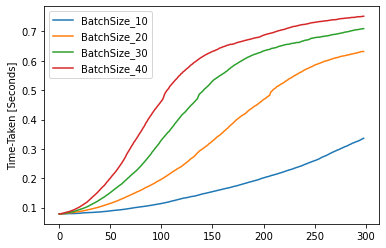

In [40]:
for participant in data.keys():
    batches=data[participant]
    plt.figure(figsize=(15,10))
    dict={}
    plt.rc('pgf', texsystem='pdflatex')
    df=pd.DataFrame(dict.items(),columns=dict.keys())
    for b in batches.keys():
        batch=batches[b]
        if bool(batch):
            g=calc_devices_mean(batch,"Round_Score",'Score')
            dict[b]=g
    for key in dict.keys():
        df[key]=dict[key]
    df.plot()
    plt.ylabel("Time-Taken [Seconds]")
    plt.savefig('roundScore.pgf')

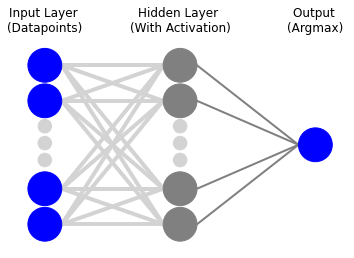

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

In [7]:
from nnv import NNV

layersList = [
    {"title":"Input Layer \n(Datapoints)", "units": 10, "color": "blue"},
    {"title":"Hidden Layer \n(With Activation)", "units": 10, "edges_color":"grey", "edges_width":2},
    {"title":"Output \n(Argmax)", "units": 1,"color": "blue"},
]

NNV(layersList,max_num_nodes_visible=4, node_radius=10, spacing_layer=60, font_size=12).render(save_to_file="my_example.png")